In [2]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images.shape

(55000, 784)

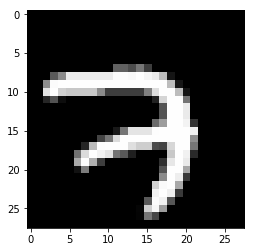

In [6]:
plt.imshow(Image.fromarray((mnist.train.images[0]*255).reshape([28,28])))

In [7]:
#从0开始到9
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
#获得批量样本
batch_images,batch_labels = mnist.train.next_batch(32)

In [9]:
batch_images.shape

(32, 784)

In [10]:
with tf.Graph().as_default() as g:
    #输入占位符
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    #标记占位符
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    
    #输出层链接权重
    out_weight = tf.Variable(tf.random_normal([784,10]))
    #偏置值一般用0初始化
    out_bias = tf.Variable(tf.zeros([10,]))
    #可以使用正态分布、均匀分布初始化参数
    #out_weight = tf.Variable(tf.random_normal_initializer([784,10]))
    #out_bias = tf.Variable(tf.random_normal_initializer([10,]))
    
    #向前传播（函数）
    logits = tf.matmul(inputs,out_weight) + out_bias
    output = tf.nn.softmax(logits)
    #可以使用不同的激活函数，例如sigmoid函数
    #logits = 1 / (1+np.exp(inputs))
    
    
    #代价函数
    loss = tf.reduce_mean(- tf.reduce_sum(labels * tf.log(output + 1e-17),axis = 1))#第一个维度axis=1
    
    #正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output,axis=1),tf.argmax(labels,axis=1)),tf.float32))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
    train_op = optim.minimize(loss)

In [11]:
with tf.Session(graph=g) as sess:
    #可以更改学习率
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    #optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    for i in range (50000):#更改成更大的数字提高正确率
   #for i in range (80000):
        batch_images,batch_labels = mnist.train.next_batch(32)
        res_loss,_ = sess.run([loss,train_op],feed_dict={
                                  inputs:batch_images,
                                  labels:batch_labels
                              })
        if i % 500 == 0:
            accs = []
            #使用测试集衡量正确率
            for j in range(10000 // 32):
                batch_images,batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            
            #代价loss  正确率acc
            print('loss %2.4f, acc %.4f' % (res_loss,accs))

loss 12.7632, acc 0.1518
loss 6.7131, acc 0.3082
loss 2.9222, acc 0.4517
loss 3.2832, acc 0.5496
loss 1.7570, acc 0.6124
loss 1.7030, acc 0.6536
loss 0.9344, acc 0.6860
loss 1.6810, acc 0.7098
loss 1.3540, acc 0.7285
loss 1.1028, acc 0.7410
loss 0.8551, acc 0.7525
loss 2.5293, acc 0.7630
loss 1.0066, acc 0.7690
loss 0.9677, acc 0.7756
loss 0.7058, acc 0.7812
loss 0.9908, acc 0.7887
loss 0.3766, acc 0.7926
loss 0.6092, acc 0.7954
loss 1.8419, acc 0.8001
loss 1.4237, acc 0.8025
loss 0.3764, acc 0.8092
loss 0.8407, acc 0.8110
loss 1.3331, acc 0.8142
loss 1.1412, acc 0.8197
loss 1.3282, acc 0.8206
loss 0.9190, acc 0.8216
loss 0.7747, acc 0.8251
loss 1.4227, acc 0.8278
loss 1.3290, acc 0.8278
loss 1.0182, acc 0.8322
loss 0.4429, acc 0.8354
loss 1.2505, acc 0.8337
loss 0.5433, acc 0.8365
loss 0.4056, acc 0.8386
loss 0.0309, acc 0.8427
loss 0.0543, acc 0.8379
loss 0.7711, acc 0.8423
loss 1.7363, acc 0.8431
loss 1.4843, acc 0.8446
loss 0.4385, acc 0.8465
loss 1.0221, acc 0.8446
loss 0.1699, ac

In [ ]:
#如何改进模型以使得模型性能增强
1、增大数据集，给模型提供更多的数据，剔除没有效用的数据
2、人工分析误差
3、分析模型的偏差和方差

In [ ]:
#如何给模型添加新的隐藏层并进行实验
在输入层和输出层之间添加隐藏层，神经元结点的数目为128，并且每一层的每一个神经元结点都有自己的权重和偏置值。